In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
data = pd.read_csv('/content/green_tech_data.csv')

In [3]:
data.head()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
0,181.089042,128.286267,0.642032,0.732568,1
1,382.750007,672.769370,0.084140,2.891096,0
2,306.197880,382.920383,0.161629,2.932858,0
3,259.530469,557.713622,0.898554,3.368435,0
4,104.606524,916.809827,0.606429,3.767411,0


In [15]:
data.describe()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,214.563260,548.048551,0.517601,2.710170,0.15000
std,104.121294,263.800127,0.293426,1.320535,0.35887
min,51.932741,106.256917,0.005062,0.564771,0.00000
25%,117.620266,317.804074,0.276880,1.623267,0.00000
50%,212.449859,555.062371,0.562555,2.793732,0.00000
75%,305.571092,789.565238,0.752367,3.810999,0.00000
max,395.410428,987.085409,0.990054,4.957273,1.00000


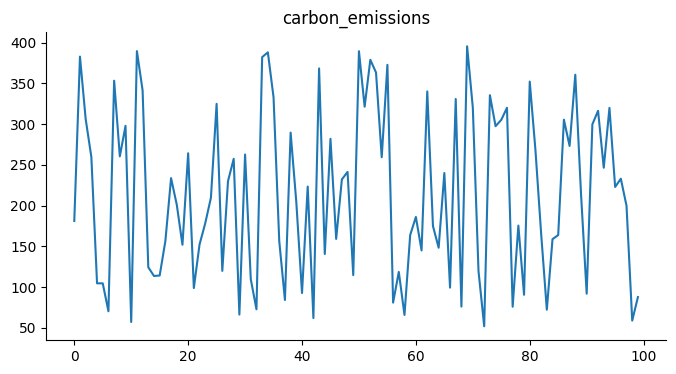

In [12]:
# @title carbon_emissions

from matplotlib import pyplot as plt
data['carbon_emissions'].plot(kind='line', figsize=(8, 4), title='carbon_emissions')
plt.gca().spines[['top', 'right']].set_visible(False)

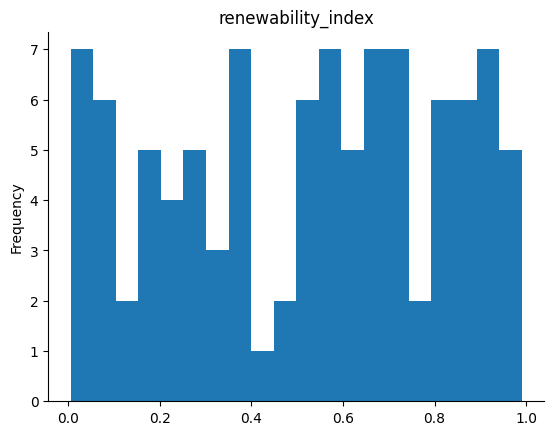

In [11]:
# @title renewability_index

from matplotlib import pyplot as plt
data['renewability_index'].plot(kind='hist', bins=20, title='renewability_index')
plt.gca().spines[['top', 'right',]].set_visible(False)

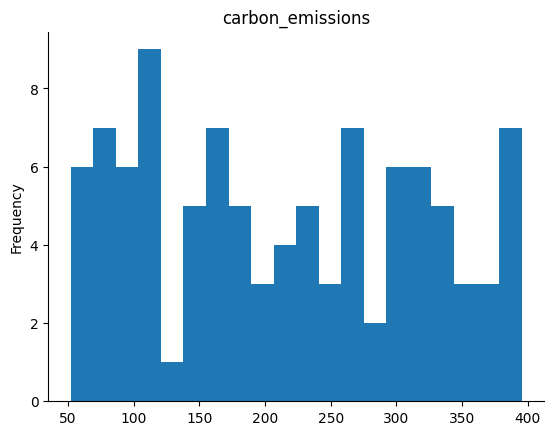

In [10]:
# @title carbon_emissions

from matplotlib import pyplot as plt
data['carbon_emissions'].plot(kind='hist', bins=20, title='carbon_emissions')
plt.gca().spines[['top', 'right',]].set_visible(False)

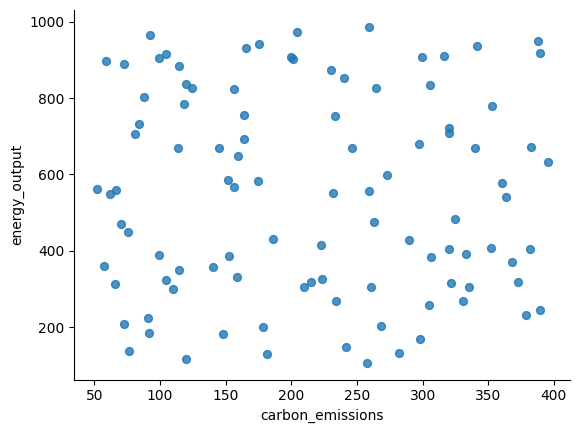

In [7]:

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='carbon_emissions', y='energy_output', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [4]:
null_values = data.isnull().sum()

print(null_values)

carbon_emissions      0
energy_output         0
renewability_index    0
cost_efficiency       0
sustainability        0
dtype: int64


sustainability
0    85
1    15
Name: count, dtype: int64


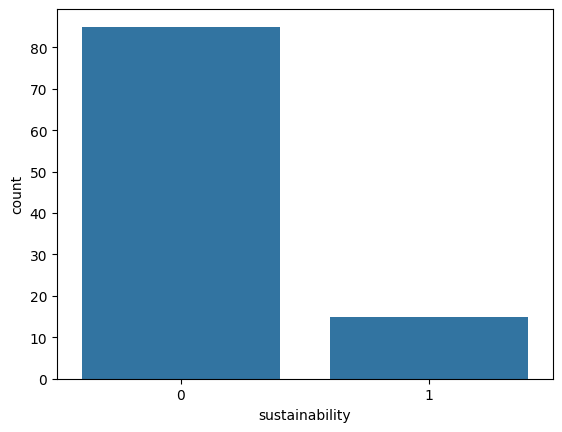

In [9]:
#check if data is balanced or not as we previously did data.head()

# Check for class imbalance
print(data['sustainability'].value_counts())
# Visualize class distribution
sns.countplot(x='sustainability', data=data)
plt.show()

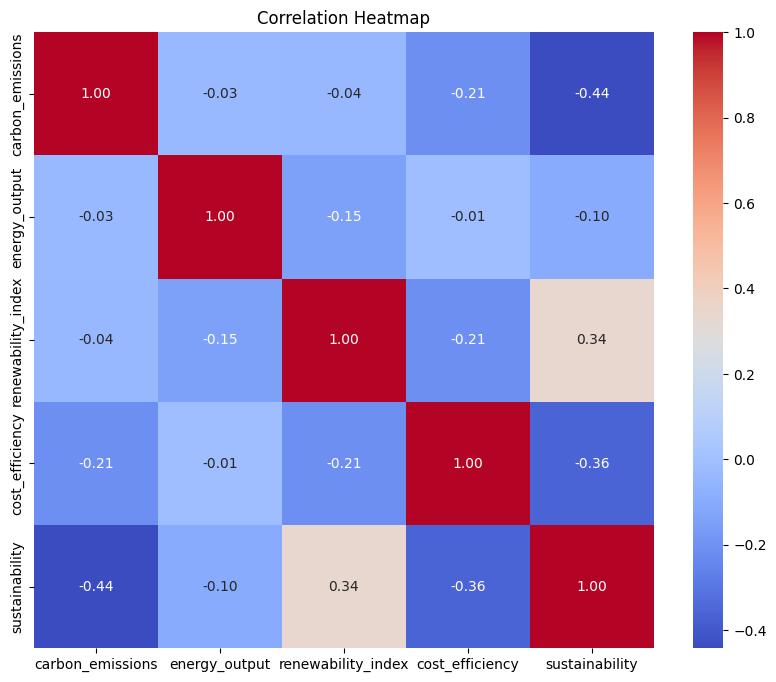

In [14]:

plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [19]:
X = data[['carbon_emissions', 'renewability_index', 'cost_efficiency']]
y = data['sustainability']


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=42)

In [21]:
X_train.head()

,carbon_emissions,renewability_index,cost_efficiency
49,114.699059,0.853009,3.316370
34,387.971212,0.195243,0.707012
7,353.161651,0.663502,1.953304
95,222.828459,0.522243,4.688408
27,229.982053,0.393098,3.252743


In [22]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [26]:
# prompt: finding the accuracy

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.95
[[33  0]
 [ 2  5]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        33
           1       1.00      0.71      0.83         7

    accuracy                           0.95        40
   macro avg       0.97      0.86      0.90        40
weighted avg       0.95      0.95      0.95        40



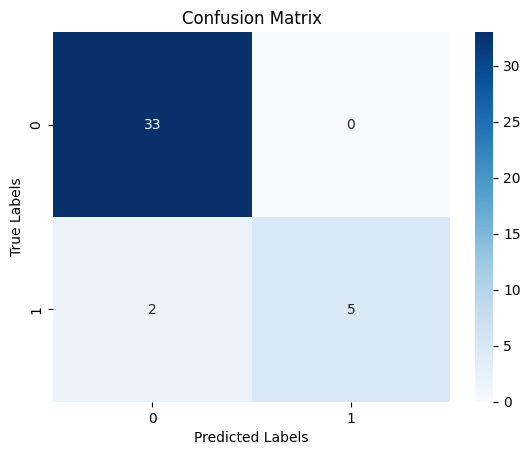

In [27]:
#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [31]:
print(classification_report(y_test, y_pred, target_names=['Not sustainable', 'sustainable']))

                 precision    recall  f1-score   support

Not sustainable       0.94      1.00      0.97        33
    sustainable       1.00      0.71      0.83         7

       accuracy                           0.95        40
      macro avg       0.97      0.86      0.90        40
   weighted avg       0.95      0.95      0.95        40



In [32]:
coefficients = pd.DataFrame(model.coef_.T, index=X.columns, columns=['coefficient'])
print(coefficients)

                    coefficient
carbon_emissions      -0.017791
renewability_index     0.712932
cost_efficiency       -1.230857


In [33]:
import joblib
joblib.dump(model, 'Irmodel_Sustainable.pkl')

['Irmodel_Sustainable.pkl']

In [35]:
model = joblib.load('Irmodel_Sustainable.pkl')

In [40]:

new_data = pd.DataFrame({
    'carbon_emissions': [10],
    'renewability_index': [0.8],
    'cost_efficiency': [0.7]
})

predictions = model.predict(new_data)
print(f"Prediction: {predictions[0]}")

probabilities = model.predict_proba(new_data)
print(f"Probabilities: {probabilities}")

Prediction: 1
Probabilities: [[0.03571767 0.96428233]]
